# Eigen-character

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
sys.path.append("../30_Code/")

In [3]:
import pickle
import Fusiform
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain

## 1. Build the matrix

### i. load first 5000 frequently characters

In [4]:
import pickle
with open("../05_Resource/as_chFreq.pickle", "rb") as fin:
    as_chfreq = pickle.load(fin)
    chars = sorted(as_chfreq.keys(), key=as_chfreq.get, reverse=True)
    freq_chars = chars[:5000]
print(freq_chars[:50] + ["..."] + freq_chars[-50:])
# kind of curious about the stroke distribution of these characters

['的', '一', '是', '不', '有', '在', '人', '我', '了', '大', '這', '以', '為', '個', '中', '他', '會', '來', '國', '上', '時', '要', '生', '到', '學', '們', '就', '可', '年', '也', '之', '出', '對', '而', '能', '說', '地', '成', '所', '多', '於', '得', '家', '十', '自', '後', '都', '子', '用', '與', '...', '稗', '泅', '洸', '搾', '賸', '訃', '鄴', '筏', '屌', '祚', '蓼', '珞', '謅', '旻', '縟', '漕', '磧', '芃', '葯', '讒', '荸', '撂', '傚', '緲', '鶲', '躑', '韙', '餬', '浚', '瓔', '胝', '螫', '澗', '箸', '葳', '嚙', '蹙', '鐐', '竽', '賁', '嗄', '燹', '蔘', '獃', '甯', '戌', '蛤', '氟', '汩', '譟']


### ii. check stroke distribution  
Strokes could be the most informative (and easily availabel) properties when analyzing visual aspect of characters

missing strokes data: 16
Strokes stat: 
M = 12.24478330658106, Med = 12.0, 
SD = 4.48, Min = 1, Max = 32
Characters with stroke >18: (443) ['體', '關', '灣', '覺', '觀', '變', '讓', '議', '類', '難', '權', '聽', '驗', '識', '藝', '邊', '歡', '顯', '響', '續', '黨', '離', '讀', '護', '證', '願', '屬', '警', '嚴', '顧', '蘇', '蘭', '競', '繼', '羅', '麗', '藥', '懷', '壞', '寶', '靈', '露', '驚', '廳', '鐵', '籍', '鐘', '釋', '攝', '觸', '鏡', '獻', '籌', '穩', '覽', '簽', '礙', '齡', '躍', '譬', '繪', '戀', '鑑', '爆', '籃', '贊', '攤', '繫', '辭', '麵', '贏', '騰', '魔', '讚', '耀', '騙', '辯', '譯', '勸', '臟', '譜', '彎', '欄', '飄', '譽', '爛', '龐', '襲', '礦', '爐', '灌', '蠻', '懼', '贈', '繳', '籠', '闢', '鑽', '驅', '鹽', '驟', '霧', '犧', '竊', '霸', '灘', '籲', '獸', '攜', '騷', '懸', '纖', '籤', '懶', '疊', '轟', '邏', '鷹', '韻', '罐', '臘', '饋', '纏', '馨', '髒', '鬱', '灑', '髓', '曝', '穫', '寵', '蟻', '鷺', '艦', '顛', '饒', '藤', '繩', '囊', '櫻', '攬', '疆', '驕', '蘋', '躁', '襯', '懲', '蘊', '矚', '曬', '艷', '轎', '嚼', '疇', '壤', '攀', '顫', '攔', '禱', '釀', '麟', '鵬', '瓊', '鏈', '蠟', '囉', '蟹', '簿', '蘆', '豔', '蹺', '癮', 

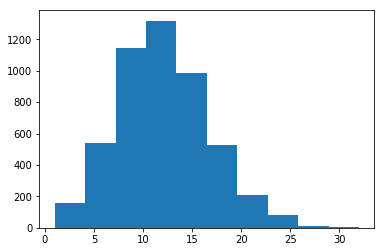

In [5]:
import json
with open("../05_Resource/stk_data.json", "r", encoding="UTF-8") as fin:
    stk_data = json.load(fin)
    freq_chars_stk = [stk_data.get(ch) for ch in freq_chars if ch in stk_data]
print(f"missing strokes data: {len(freq_chars) - len(freq_chars_stk)}")
plt.hist(freq_chars_stk)
print(f"Strokes stat: \nM = {np.mean(freq_chars_stk)}, "
      f"Med = {np.median(freq_chars_stk)}, \nSD = {np.std(freq_chars_stk):.2f}, "
      f"Min = {min(freq_chars_stk)}, Max = {max(freq_chars_stk)}")
cplx_chars = [ch for ch in freq_chars if stk_data.get(ch,-1) > 18]
print(f"Characters with stroke >18: ({len(cplx_chars)})", cplx_chars)

## 2. Digesting characters into a matrix

In [6]:
freq_str = "".join(freq_chars)
txt_w, txt_h = Fusiform.measure_text(freq_str)
im = Fusiform.text2bitmap(freq_str, (txt_w, txt_h+1))

In [7]:
mat_digestor = Fusiform.MatrixDigestor(
                    Fusiform.spotlight.spotlight_rectangle, 
                    Fusiform.steps.step_char_wise)

In [8]:
m_path = Fusiform.get_data_path("", "character_M.pkl")
if m_path.exists():
    with open(m_path, "rb") as fin:
        M = pickle.load(fin)
else:
    M, _ = mat_digestor.digest(im, xoffset=0, nchar=1, step_overlap=False)
    print(M.shape)

(4800, 5000)


Note: note how reshaping transform the dimension. In MatrixDigestor, I simpy use reshape default order (order='C', column major, with the last axis index changing fastest, and the first axis index changing slowest) to flatten the matrix into vector. However, when reshape back, I need to use 'Fortran' order (order='F', row major, with the first index changing fastest, and the last index changing slowest). 
c.f. https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

In [9]:
m_path = Fusiform.get_data_path("", "character_M.pkl")
with open(m_path, "wb") as fout:
    pickle.dump(M, fout)

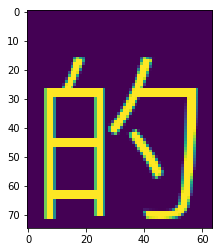

In [10]:
im_height = im.size[1]
plt.imshow(M[:,0].reshape([-1,im_height], order='F').transpose())

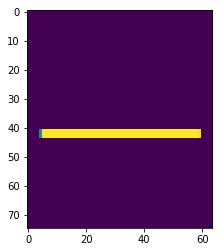

In [11]:
def recon_char(vec):
    return vec.reshape([-1,im_height], order='F').transpose()
plt.imshow(recon_char(M[:,1]))

### ii. decomposing M

Use numpy SVD  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html  
If matrix get larger, considering this:  
https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html#sklearn.utils.extmath.randomized_svd
extmath.randomized_svd: compute the k-truncated randomized SVD. This algorithm finds the exact truncated singular values decomposition using randomization to speed up the computations. It is particularly fast on large matrices on which you wish to extract only a small number of components.

In [12]:
from sklearn.utils.extmath import randomized_svd

In [13]:
svd_path = Fusiform.get_data_path("", "character_svd.pkl")
if svd_path.exists():
    with open(svd_path, "rb") as fin:
        U, S, Vt = pickle.load(fin)
else:
    U, S, Vt = randomized_svd(M, n_components=500, random_state=3423)
    with open(svd_path, "wb") as fout:
        pickle.dump((U, S, Vt), fout)

In [14]:
print(f"dimensions: U({U.shape}), S({S.shape}), V({Vt.shape})")

dimensions: U((4800, 500)), S((500,)), V((500, 5000))


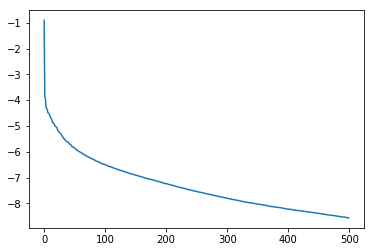

In [15]:
# Frobenius norm: root sum of square of singular values (see appendix)
fnorm2 = np.sum(S**2)
S_prop = S**2/fnorm2
plt.plot(np.log(S_prop+1e-4))

In [16]:
# save coefficient
def save_coeffs(chars, S, Vt):
    itos = {i: c for i, c in enumerate(chars)}
    stoi = {v: k for k, v in itos.items()}
    vectors = np.dot(np.diag(S), Vt)
    cv_path = Fusiform.get_data_path('', 'charac_coeff.pkl')
    with open(cv_path, "wb") as fout:
        pickle.dump((itos, stoi, vectors.transpose()), fout)

In [17]:
save_coeffs(freq_str, S, Vt)
cv_path = Fusiform.get_data_path('', 'charac_coeff.pkl')
if cv_path.exists():
    with open(cv_path, "rb") as fin:
        cv_itos, cv_stoi, cv_vectors = pickle.load(fin)

### iii. reconstruct with truncated singular vectors

#### a. recon with K = 10

In [18]:
def recon_k(k):    
    Uk, Sk, Vk = U[:,:k], S[:k], Vt[:k, :]
    Mk = np.dot(np.dot(Uk, np.diag(Sk)), Vk)
    size = (3, 6)
    fig, axes = plt.subplots(*size)
    fig.set_size_inches(12, 6)
    for i, ax in enumerate(chain.from_iterable(axes)):        
        if i < size[0]*size[1]/2:
            recon_x = recon_char(Mk[:,i])
        else:
            recon_x = recon_char(Mk[:,1000+i])
        ax.imshow(recon_x, cmap='gray')
        ax.axis('off')
        

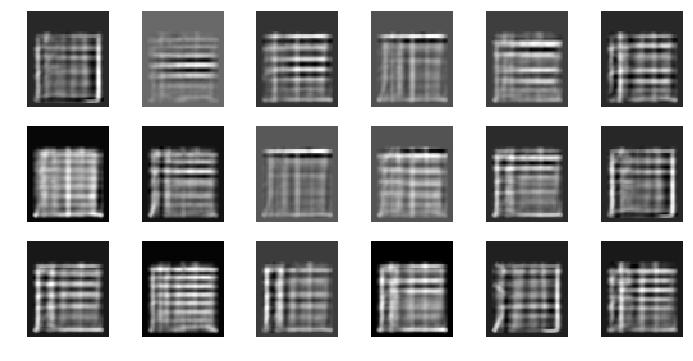

In [19]:
recon_k(10)

#### Recon with K=50

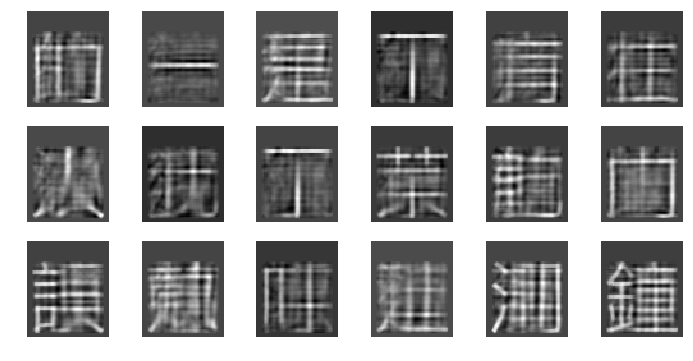

In [20]:
recon_k(50)

#### Recon with K=100

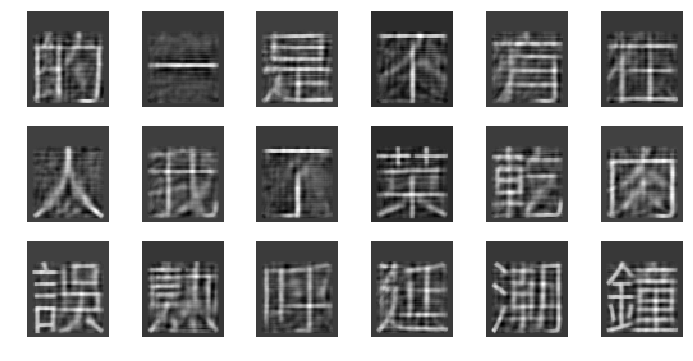

In [21]:
recon_k(100)

#### c. Recon with K = 300

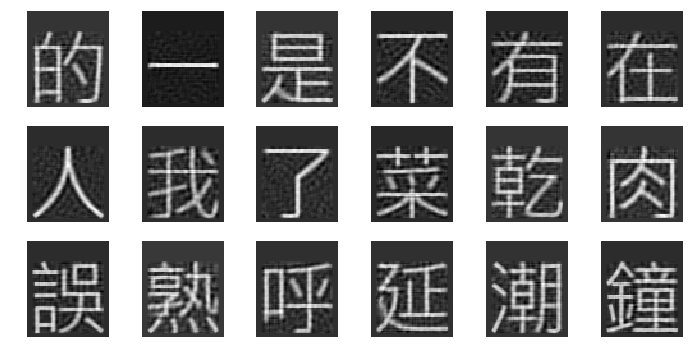

In [22]:
recon_k(300)

### iv. What's the singular vectors??

In [23]:
def plot_ECs_50(offset=0):
    fig, axes = plt.subplots(5, 10, squeeze=False)
    fig.set_size_inches(12, 8)
    for v, ax in enumerate(chain.from_iterable(axes)):
        ec_i = v + offset
        ax.imshow(recon_char(U[:,ec_i]), cmap='gray')
        ax.axis('off')
        ax.set_title(f'EC{ec_i}')
    return fig

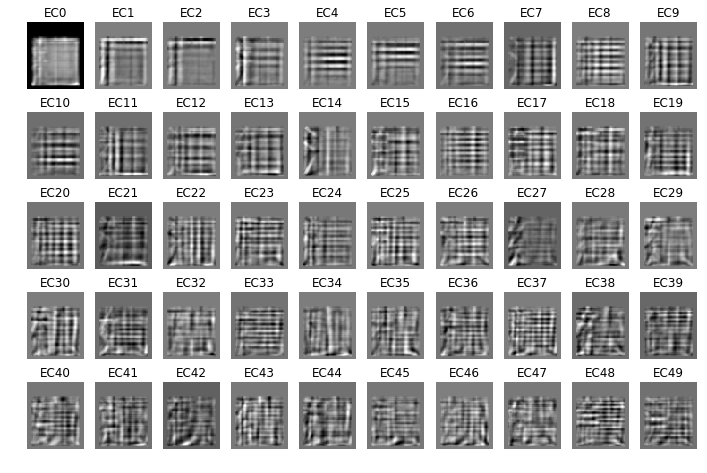

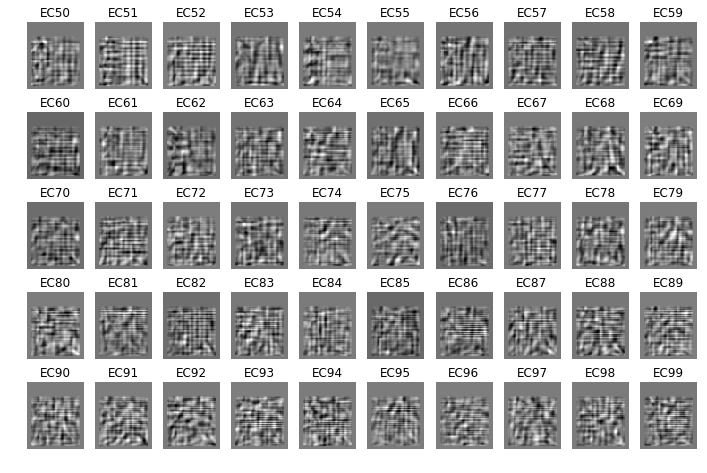

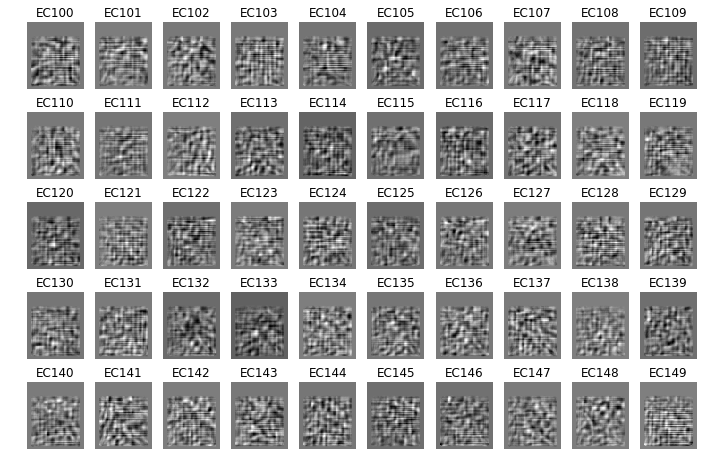

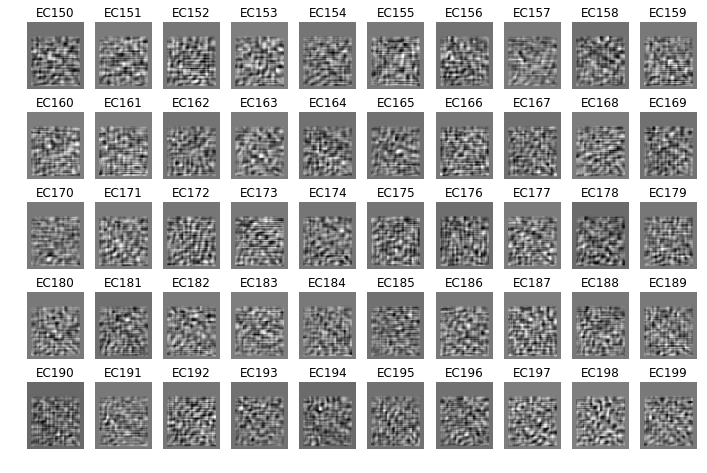

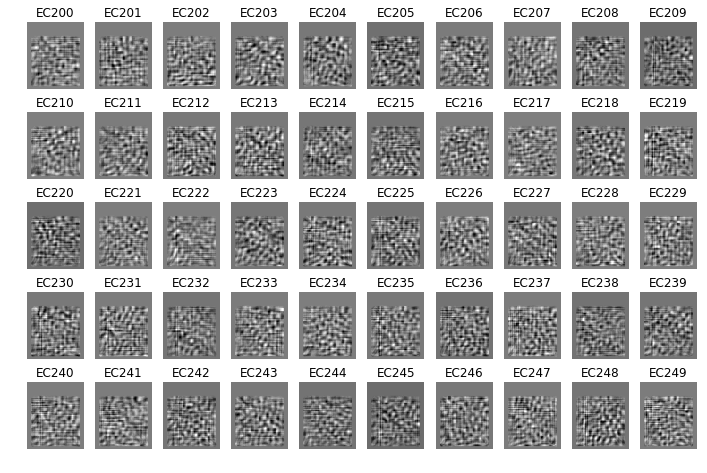

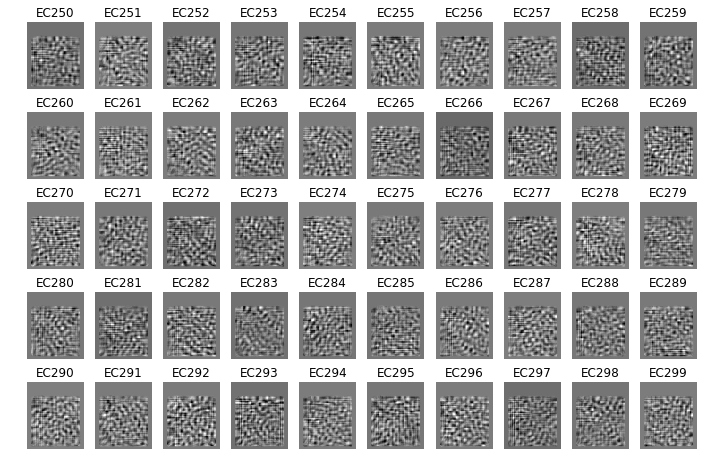

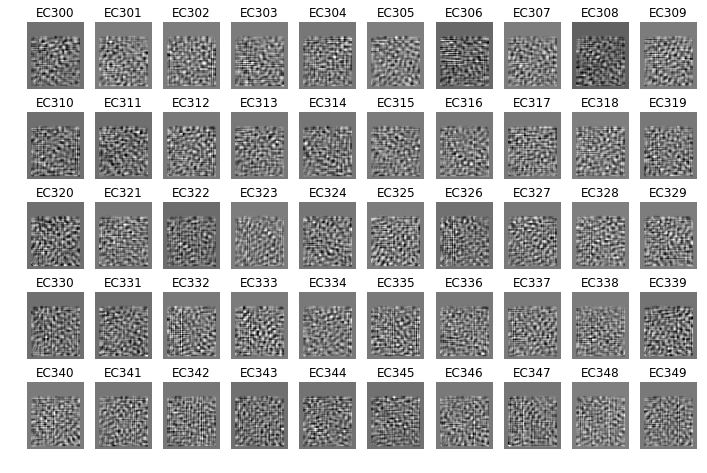

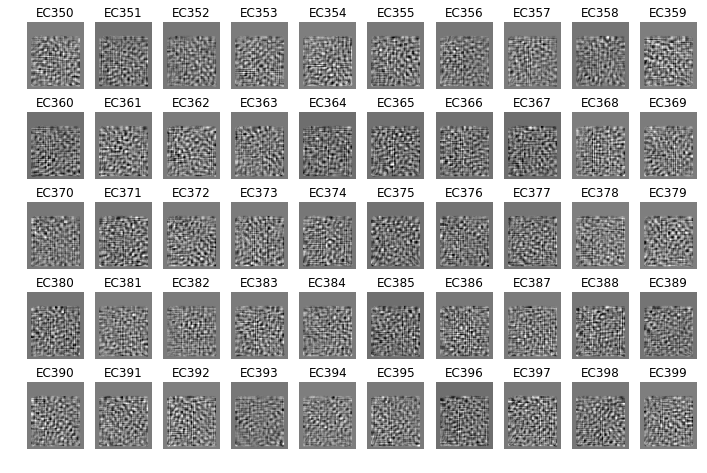

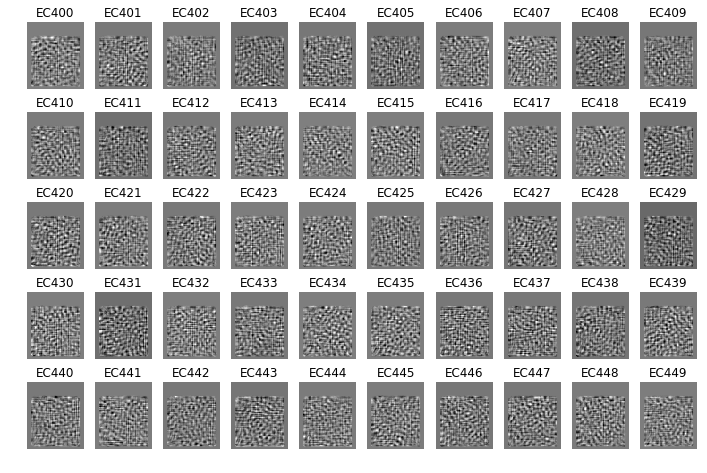

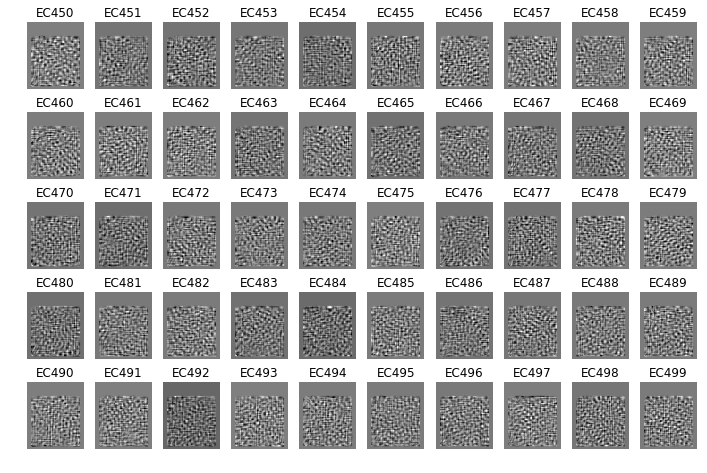

In [24]:
for ec_i in range(0, len(S), 50):
    fig_path_x = Fusiform.get_data_path("ECs", f"ECs_figure{ec_i:#03d}.png")
    fig_x = plot_ECs_50(ec_i)
    fig_x.savefig(fig_path_x, dpi=150)    

# Appendix

From [Wikipedia][link]:
When p = q = 2 for the $L_{p,q}$ norm, it is called the '''Frobenius norm''' or the '''Hilbert–Schmidt norm''', though the latter term is used more frequently in the context of operators on (possibly infinite-dimensional) [[Hilbert space]]. This norm can be defined in various ways:

$$
\|A\|_{\rm F} = \sqrt{\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2} = \sqrt{\operatorname{trace}\left(A^* A\right)} = \sqrt{\sum_{i=1}^{\min\{m, n\}} \sigma_i^2(A)}
$$

[link]: https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm

In [25]:
# root sum of square of each matrix elemennts
np.sqrt(np.sum(M**2))

553550.21916986

In [26]:
# square of trace
np.sqrt(np.trace(np.dot(np.transpose(M), M)))

553550.21916986

In [27]:
# root sum of square of singular values (partially decomposed)
np.sqrt(np.sum(S**2))

545017.0094159988